In [5]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Define input variables with corrected ranges
soil_moisture = ctrl.Antecedent(np.arange(10, 31, 0.1), 'soil_moisture')
rainfall = ctrl.Antecedent(np.arange(20, 299, 1), 'rainfall')
humidity = ctrl.Antecedent(np.arange(14, 100, 1), 'humidity')
temperature = ctrl.Antecedent(np.arange(8.8, 44, 0.1), 'temperature')

# Define output variable
pump = ctrl.Consequent(np.arange(0, 2, 1), 'pump')

# Define bell-shaped membership function
def bell_mf(x, a, b, c):
    return 1 / (1 + np.abs((x - c) / a) ** (2 * b))

# Assign membership functions to inputs
soil_moisture['low'] = bell_mf(soil_moisture.universe, 5, 2, 12)
soil_moisture['medium'] = bell_mf(soil_moisture.universe, 5, 2, 20)
soil_moisture['high'] = bell_mf(soil_moisture.universe, 5, 2, 26)
soil_moisture['very_high'] = bell_mf(soil_moisture.universe, 5, 2, 30)

rainfall['very_low'] = bell_mf(rainfall.universe, 20, 2, 30)
rainfall['low'] = bell_mf(rainfall.universe, 20, 2, 70)
rainfall['mid'] = bell_mf(rainfall.universe, 20, 2, 100)
rainfall['high'] = bell_mf(rainfall.universe, 20, 2, 150)
rainfall['very_high'] = bell_mf(rainfall.universe, 20, 2, 200)
rainfall['extremely_high'] = bell_mf(rainfall.universe, 20, 2, 280)

humidity['very_low'] = bell_mf(humidity.universe, 10, 2, 15)
humidity['low'] = bell_mf(humidity.universe, 10, 2, 35)
humidity['mid'] = bell_mf(humidity.universe, 10, 2, 55)
humidity['high'] = bell_mf(humidity.universe, 10, 2, 75)
humidity['very_high'] = bell_mf(humidity.universe, 10, 2, 90)
humidity['extremely_high'] = bell_mf(humidity.universe, 10, 2, 99)

temperature['low'] = bell_mf(temperature.universe, 5, 2, 15)
temperature['mid'] = bell_mf(temperature.universe, 5, 2, 25)
temperature['high'] = bell_mf(temperature.universe, 5, 2, 35)

# Define output membership functions
pump['ON'] = bell_mf(pump.universe, 1, 2, 1)
pump['OFF'] = bell_mf(pump.universe, 1, 2, 0)

# Define fuzzy rules
rules = [
    ctrl.Rule(soil_moisture['very_high'], pump['OFF']),
    ctrl.Rule(soil_moisture['low'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['extremely_high'] & humidity['very_high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['extremely_high'] & humidity['extremely_high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['very_high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['low'] & temperature['low'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['low'] & temperature['mid'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['low'] & temperature['high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['extremely_high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['mid'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['low'] & temperature['mid'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['low'] & temperature['low'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['low'] & temperature['high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['very_low'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['extremely_high'] & temperature['mid'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['extremely_high'] & temperature['low'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['extremely_high'] & temperature['high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['very_high'] & temperature['mid'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['mid'] & temperature['mid'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['mid'] & temperature['low'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['mid'] & temperature['high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['very_low'] & temperature['low'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['very_low'] & temperature['mid'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['very_high'] & temperature['mid'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['very_high'] & temperature['high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['very_high'] & temperature['low'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['extremely_high'] & temperature['mid'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['extremely_high'] & temperature['high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_low'] & humidity['low'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_low'] & humidity['very_high'] & temperature['mid'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_low'] & humidity['extremely_high'] & temperature['mid'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['mid'] & temperature['mid'], pump['ON']),
    ctrl.Rule(soil_moisture['medium'], pump['ON']),
    ctrl.Rule(soil_moisture['medium'] & rainfall['very_high'], pump['ON']),
]

# Create control system
pump_ctrl = ctrl.ControlSystem(rules)
pump_sim = ctrl.ControlSystemSimulation(pump_ctrl)

# Example input
pump_sim.input['soil_moisture'] = 23
pump_sim.input['rainfall'] = 251
pump_sim.input['humidity'] = 83
pump_sim.input['temperature'] = 23

# Compute output
pump_sim.compute()
print(f"Pump Status: {'ON' if pump_sim.output['pump'] > 0.5 else 'OFF'}")


Pump Status: ON


In [66]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Define input variables with corrected ranges
soil_moisture = ctrl.Antecedent(np.arange(10, 31, 0.1), 'soil_moisture')
rainfall = ctrl.Antecedent(np.arange(20, 299, 1), 'rainfall')
humidity = ctrl.Antecedent(np.arange(14, 100, 1), 'humidity')
temperature = ctrl.Antecedent(np.arange(8.8, 44, 0.1), 'temperature')
ph = ctrl.Antecedent(np.arange(4, 10, 0.1), 'ph')

# Define output variable as a Sugeno-type
pump = ctrl.Consequent(np.arange(0, 2, 1), 'pump')

# Define bell-shaped membership function
def bell_mf(x, a, b, c):
    return 1 / (1 + np.abs((x - c) / a) ** (2 * b))

# Assign membership functions to inputs
soil_moisture['low'] = bell_mf(soil_moisture.universe, 5, 2, 12)
soil_moisture['medium'] = bell_mf(soil_moisture.universe, 5, 2, 20)
soil_moisture['high'] = bell_mf(soil_moisture.universe, 5, 2, 26)
soil_moisture['very_high'] = bell_mf(soil_moisture.universe, 5, 2, 30)

rainfall['extremely_low'] = bell_mf(rainfall.universe, 20, 2, 20)
rainfall['very_low'] = bell_mf(rainfall.universe, 20, 2, 30)
rainfall['low'] = bell_mf(rainfall.universe, 20, 2, 70)
rainfall['mid'] = bell_mf(rainfall.universe, 20, 2, 100)
rainfall['high'] = bell_mf(rainfall.universe, 20, 2, 150)
rainfall['very_high'] = bell_mf(rainfall.universe, 20, 2, 200)
rainfall['extremely_high'] = bell_mf(rainfall.universe, 20, 2, 280)

humidity['very_low'] = bell_mf(humidity.universe, 10, 2, 15)
humidity['low'] = bell_mf(humidity.universe, 10, 2, 35)
humidity['mid'] = bell_mf(humidity.universe, 10, 2, 55)
humidity['high'] = bell_mf(humidity.universe, 10, 2, 75)
humidity['very_high'] = bell_mf(humidity.universe, 10, 2, 90)
humidity['extremely_high'] = bell_mf(humidity.universe, 10, 2, 99)

temperature['low'] = bell_mf(temperature.universe, 5, 2, 15)
temperature['mid'] = bell_mf(temperature.universe, 5, 2, 25)
temperature['high'] = bell_mf(temperature.universe, 5, 2, 35)
temperature['very_high'] = bell_mf(temperature.universe, 5, 2, 40)

ph['low'] = bell_mf(ph.universe, 1, 2, 5)
ph['high'] = bell_mf(ph.universe, 1, 2, 8)

# Define output rules as constants (0-order Sugeno)
pump['ON'] = fuzz.trimf(pump.universe, [1, 1, 1])  # Constant output: ON
pump['OFF'] = fuzz.trimf(pump.universe, [0, 0, 0])  # Constant output: OFF

rules = [
    ctrl.Rule(soil_moisture['very_high'], pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_low'] & humidity['very_high'] & temperature['high'], pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_low'] & humidity['very_high'] & temperature['mid'], pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_low'] & humidity['mid'] & ph['high'], pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_low'] & humidity['extremely_high'] & temperature['very_high'], pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_low'] & humidity['extremely_high'] & temperature['high'], pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_low'] & humidity['extremely_high'] & temperature['mid'], pump, 1),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_low'] & humidity['high'], pump, 1),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_low'] & humidity['low'], pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['very_low'] & temperature['low'], pump, 1),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['extremely_high'] & temperature['very_high'], pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['extremely_high'] & temperature['high'], pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['extremely_high'] & temperature['mid'], pump, 1),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['mid'], pump, 1),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['very_high'] & temperature['mid'], pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['very_high'] & temperature['high'], pump, 1),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['low'] & temperature['mid'], pump, 1),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['low'] & temperature['very_high'], pump, 1),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['low'] & temperature['high'], pump, 1),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['low'] & temperature['low'], pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['high'], pump, 0),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['extremely_high'] & temperature['very_high'], pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['extremely_high'] & temperature['high'], pump, 1),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['extremely_high'] & temperature['mid'], pump, 1),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['mid'] & ph['low'], pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['mid'] & ph['high'], pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['high'] & ph['low'], pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['high'] & ph['high'], pump, 1),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['very_high'] & temperature['low'], pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['very_high'] & temperature['mid'], pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['very_high'] & temperature['very_high'], pump, 1),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['very_high'] & temperature['very_high'], pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['very_low'] & temperature['low'], pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['very_low'] & temperature['mid'], pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['low'] & temperature['high'], pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['low'] & temperature['mid'], pump, 1),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['extremely_high'] & temperature['low'], pump, 1),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['extremely_high'] & temperature['mid'], pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['extremely_high'] & temperature['high'], pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['extremely_high'] & temperature['very_high'], pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['very_low'] & ph['low'] , pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['very_low'] & ph['high'] , pump, 1),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['low'] & temperature['high'], pump, 1),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['low'] & temperature['mid'], pump, 1),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['low'] & temperature['very_high'], pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['very_high'] & ph['low'] , pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['very_high'] & ph['high'] , pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['mid'] & temperature['mid'] , pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['mid'] & temperature['low'] , pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['high'] & temperature['mid'] , pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['high'], pump, 1),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['low'] & temperature['high'], pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['low'] & temperature['low'], pump, 1),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['extremely_high'] & temperature['high'], pump, 1),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['extremely_high'] & temperature['mid'], pump, 1),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['extremely_high'] & temperature['very_high'], pump, 1),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['very_high'] & ph['low'] , pump, 1),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['very_high'] & ph['high'] , pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['mid'], pump, 1),
    ctrl.Rule(soil_moisture['high'] & rainfall['extremely_low'] & humidity['low'] & temperature['high'], pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['extremely_low'] & humidity['extremely_high'] & temperature['high'], pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['extremely_low'] & humidity['mid'] & temperature['high'], pump, 1),
    ctrl.Rule(soil_moisture['high'] & rainfall['extremely_low'] & temperature['mid'], pump, 1),
    ctrl.Rule(soil_moisture['high'] & rainfall['extremely_low'] & temperature['low'], pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['extremely_high'] & temperature['mid'] & ph['low'], pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['extremely_high'] & temperature['mid'] & ph['high'], pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['extremely_high'] & temperature['low'], pump, 1),
    ctrl.Rule(soil_moisture['high'] & rainfall['extremely_high'] & humidity['extremely_high'] & temperature['high'], pump,0),
    ctrl.Rule(soil_moisture['high'] & rainfall['extremely_high'] & humidity['very_high'] & temperature['high'], pump,0),
    ctrl.Rule(soil_moisture['low'], pump, 1),
    ctrl.Rule(soil_moisture['medium'], pump, 1)
]

# Create control system
pump_ctrl = ctrl.ControlSystem(rules)
pump_sim = ctrl.ControlSystemSimulation(pump_ctrl)

# Example input
pump_sim.input['soil_moisture'] = 20
pump_sim.input['rainfall'] = 100
pump_sim.input['humidity'] = 90
pump_sim.input['temperature'] = 8.8
pump_sim.input['ph'] = 5

# Compute output
pump_sim.compute()
print(f"Pump Status: {'ON' if pump_sim.output['pump'] > 0.5 else 'OFF'}")


ValueError: Unexpected consequent type

In [19]:
import numpy as np

# Define bell-shaped membership function
def bell_mf(x, a, b, c):
    return 1 / (1 + np.abs((x - c) / a) ** (2 * b))

# Define fuzzy sets for inputs
def get_membership_values(soil_moisture, rainfall, humidity, temperature):
    membership = {}

    membership['soil_moisture_low'] = bell_mf(soil_moisture, 5, 2, 12)
    membership['soil_moisture_medium'] = bell_mf(soil_moisture, 5, 2, 20)
    membership['soil_moisture_high'] = bell_mf(soil_moisture, 5, 2, 26)
    membership['soil_moisture_very_high'] = bell_mf(soil_moisture, 5, 2, 30)

    membership['rainfall_very_low'] = bell_mf(rainfall, 20, 2, 30)
    membership['rainfall_low'] = bell_mf(rainfall, 20, 2, 70)
    membership['rainfall_mid'] = bell_mf(rainfall, 20, 2, 100)
    membership['rainfall_high'] = bell_mf(rainfall, 20, 2, 150)
    membership['rainfall_very_high'] = bell_mf(rainfall, 20, 2, 200)
    membership['rainfall_extremely_high'] = bell_mf(rainfall, 20, 2, 280)

    membership['humidity_very_low'] = bell_mf(humidity, 10, 2, 15)
    membership['humidity_low'] = bell_mf(humidity, 10, 2, 35)
    membership['humidity_mid'] = bell_mf(humidity, 10, 2, 55)
    membership['humidity_high'] = bell_mf(humidity, 10, 2, 75)
    membership['humidity_very_high'] = bell_mf(humidity, 10, 2, 90)
    membership['humidity_extremely_high'] = bell_mf(humidity, 10, 2, 99)

    membership['temperature_low'] = bell_mf(temperature, 5, 2, 15)
    membership['temperature_mid'] = bell_mf(temperature, 5, 2, 25)
    membership['temperature_high'] = bell_mf(temperature, 5, 2, 35)

    return membership

# Define rules and their output values (TSK 0-order)
rules = [
    (['soil_moisture_very_high'], 0),  # Pump OFF
    (['soil_moisture_low'], 1),  # Pump ON
    (['soil_moisture_high', 'rainfall_extremely_high', 'humidity_very_high'], 1),
    (['soil_moisture_high', 'rainfall_extremely_high', 'humidity_extremely_high'], 0),
    (['soil_moisture_high', 'rainfall_very_high', 'humidity_very_high'], 1),
    (['soil_moisture_medium'], 1),
]

# Function to evaluate fuzzy rules and compute output
def evaluate_tsk(soil_moisture, rainfall, humidity, temperature):
    membership_values = get_membership_values(soil_moisture, rainfall, humidity, temperature)

    numerator = 0
    denominator = 0

    for rule_conditions, rule_output in rules:
        # Compute rule activation (minimum of all involved memberships)
        rule_activation = min(membership_values[condition] for condition in rule_conditions)

        # Weighted sum for TSK model
        numerator += rule_activation * rule_output
        denominator += rule_activation

    # Defuzzification: Weighted average (if denominator is 0, default to 0)
    pump_status = numerator / denominator if denominator != 0 else 0

    return "ON" if pump_status > 0.5 else "OFF"

# Example input
soil_moisture = 23
rainfall = 251
humidity = 83
temperature = 23

# Compute output
pump_status = evaluate_tsk(soil_moisture, rainfall, humidity, temperature)
print(f"Pump Status: {pump_status}")


Pump Status: ON


In [64]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Define input variables
soil_moisture = ctrl.Antecedent(np.arange(10, 31, 0.1), 'soil_moisture')
rainfall = ctrl.Antecedent(np.arange(20, 299, 1), 'rainfall')
humidity = ctrl.Antecedent(np.arange(14, 100, 1), 'humidity')
temperature = ctrl.Antecedent(np.arange(8.8, 44, 0.1), 'temperature')
ph = ctrl.Antecedent(np.arange(4, 10, 0.1), 'ph')

# Define output variable as a Sugeno-type
pump = ctrl.Consequent(np.arange(0, 2, 1), 'pump')


# Define bell-shaped membership function
def bell_mf(x, a, b, c):
    return 1 / (1 + np.abs((x - c) / a) ** (2 * b))

# Assign membership functions to inputs
soil_moisture['low'] = bell_mf(soil_moisture.universe, 5, 2, 12)
soil_moisture['medium'] = bell_mf(soil_moisture.universe, 5, 2, 20)
soil_moisture['high'] = bell_mf(soil_moisture.universe, 5, 2, 26)
soil_moisture['very_high'] = bell_mf(soil_moisture.universe, 5, 2, 30)

rainfall['low'] = bell_mf(rainfall.universe, 20, 2, 50)
rainfall['medium'] = bell_mf(rainfall.universe, 20, 2, 120)
rainfall['high'] = bell_mf(rainfall.universe, 20, 2, 200)

humidity['low'] = bell_mf(humidity.universe, 10, 2, 30)
humidity['medium'] = bell_mf(humidity.universe, 10, 2, 60)
humidity['high'] = bell_mf(humidity.universe, 10, 2, 90)

temperature['low'] = bell_mf(temperature.universe, 5, 2, 15)
temperature['medium'] = bell_mf(temperature.universe, 5, 2, 25)
temperature['high'] = bell_mf(temperature.universe, 5, 2, 35)

ph['low'] = bell_mf(ph.universe, 1, 2, 5)
ph['high'] = bell_mf(ph.universe, 1, 2, 8)

# Define output rules as constants (0-order Sugeno)
pump['ON'] = fuzz.trimf(pump.universe, [1, 1, 1])  # Constant output: ON
pump['OFF'] = fuzz.trimf(pump.universe, [0, 0, 0])  # Constant output: OFF

# Define rules
rules = [
    ctrl.Rule(soil_moisture['very_high'], pump['OFF']),
    ctrl.Rule(soil_moisture['low'], pump['ON']),
    ctrl.Rule(soil_moisture['medium'] & rainfall['medium'] & humidity['medium'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & temperature['high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & humidity['low'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & humidity['high'] & rainfall['high'], pump['OFF']),
]

# Create control system
pump_ctrl = ctrl.ControlSystem(rules)
pump_sim = ctrl.ControlSystemSimulation(pump_ctrl)

# Example input
pump_sim.input['soil_moisture'] = 20
pump_sim.input['rainfall'] = 100
pump_sim.input['humidity'] = 90
pump_sim.input['temperature'] = 8.8
#pump_sim.input['ph'] = 5

# Compute output
pump_sim.compute()
print(f"Pump Status: {'ON' if pump_sim.output['pump'] > 0.5 else 'OFF'}")


Pump Status: ON


In [121]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Define input variables with corrected ranges
soil_moisture = ctrl.Antecedent(np.arange(10, 31, 0.1), 'soil_moisture')
rainfall = ctrl.Antecedent(np.arange(20, 299, 1), 'rainfall')
humidity = ctrl.Antecedent(np.arange(14, 100, 1), 'humidity')
temperature = ctrl.Antecedent(np.arange(8.8, 44, 0.1), 'temperature')
ph = ctrl.Antecedent(np.arange(4, 10, 0.1), 'ph')

# Define TSK 0th-order output variable using a supported defuzzification method
pump = ctrl.Consequent(np.linspace(0, 1, 2), 'pump', defuzzify_method='centroid')

pump['OFF'] = np.array([0, 0])
pump['ON']  = np.array([1, 1])

# Define bell-shaped membership function
def bell_mf(x, a, b, c):
    return 1 / (1 + np.abs((x - c) / a) ** (2 * b))

# Assign membership functions to inputs
soil_moisture['low'] = bell_mf(soil_moisture.universe, 5, 2, 12)
soil_moisture['medium'] = bell_mf(soil_moisture.universe, 5, 2, 20)
soil_moisture['high'] = bell_mf(soil_moisture.universe, 5, 2, 26)
soil_moisture['very_high'] = bell_mf(soil_moisture.universe, 5, 2, 30)

rainfall['extremely_low'] = bell_mf(rainfall.universe, 20, 2, 20)
rainfall['very_low'] = bell_mf(rainfall.universe, 20, 2, 30)
rainfall['low'] = bell_mf(rainfall.universe, 20, 2, 70)
rainfall['mid'] = bell_mf(rainfall.universe, 20, 2, 100)
rainfall['high'] = bell_mf(rainfall.universe, 20, 2, 150)
rainfall['very_high'] = bell_mf(rainfall.universe, 20, 2, 200)
rainfall['extremely_high'] = bell_mf(rainfall.universe, 20, 2, 280)

humidity['very_low'] = bell_mf(humidity.universe, 10, 2, 15)
humidity['low'] = bell_mf(humidity.universe, 10, 2, 35)
humidity['mid'] = bell_mf(humidity.universe, 10, 2, 55)
humidity['high'] = bell_mf(humidity.universe, 10, 2, 75)
humidity['very_high'] = bell_mf(humidity.universe, 10, 2, 90)
humidity['extremely_high'] = bell_mf(humidity.universe, 10, 2, 99)

temperature['low'] = bell_mf(temperature.universe, 5, 2, 15)
temperature['mid'] = bell_mf(temperature.universe, 5, 2, 25)
temperature['high'] = bell_mf(temperature.universe, 5, 2, 35)
temperature['very_high'] = bell_mf(temperature.universe, 5, 2, 40)

ph['low'] = bell_mf(ph.universe, 1, 2, 5)
ph['high'] = bell_mf(ph.universe, 1, 2, 8)

rules = [
    ctrl.Rule(soil_moisture['very_high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_low'] & humidity['very_high'] & temperature['high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_low'] & humidity['very_high'] & temperature['mid'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_low'] & humidity['mid'] & ph['high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_low'] & humidity['extremely_high'] & temperature['very_high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_low'] & humidity['extremely_high'] & temperature['high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_low'] & humidity['extremely_high'] & temperature['mid'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_low'] & humidity['high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_low'] & humidity['low'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['very_low'] & temperature['low'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['extremely_high'] & temperature['very_high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['extremely_high'] & temperature['high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['extremely_high'] & temperature['mid'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['mid'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['very_high'] & temperature['mid'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['very_high'] & temperature['high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['low'] & temperature['mid'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['low'] & temperature['very_high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['low'] & temperature['high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['low'] & temperature['low'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['extremely_high'] & temperature['very_high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['extremely_high'] & temperature['high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['extremely_high'] & temperature['mid'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['mid'] & ph['low'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['mid'] & ph['high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['high'] & ph['low'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['high'] & ph['high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['very_high'] & temperature['low'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['very_high'] & temperature['mid'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['very_high'] & temperature['very_high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['very_high'] & temperature['very_high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['very_low'] & temperature['low'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['very_low'] & temperature['mid'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['low'] & temperature['high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['low'] & temperature['mid'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['extremely_high'] & temperature['low'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['extremely_high'] & temperature['mid'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['extremely_high'] & temperature['high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['extremely_high'] & temperature['very_high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['very_low'] & ph['low'] , pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['very_low'] & ph['high'] , pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['low'] & temperature['high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['low'] & temperature['mid'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['low'] & temperature['very_high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['very_high'] & ph['low'] , pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['very_high'] & ph['high'] , pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['mid'] & temperature['mid'] , pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['mid'] & temperature['low'] , pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['high'] & temperature['mid'] , pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['low'] & temperature['high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['low'] & temperature['low'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['extremely_high'] & temperature['high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['extremely_high'] & temperature['mid'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['extremely_high'] & temperature['very_high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['very_high'] & ph['low'] , pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['very_high'] & ph['high'] , pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['mid'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['extremely_low'] & humidity['low'] & temperature['high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['extremely_low'] & humidity['extremely_high'] & temperature['high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['extremely_low'] & humidity['mid'] & temperature['high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['extremely_low'] & temperature['mid'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['extremely_low'] & temperature['low'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['extremely_high'] & temperature['mid'] & ph['low'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['extremely_high'] & temperature['mid'] & ph['high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['extremely_high'] & temperature['low'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['extremely_high'] & humidity['extremely_high'] & temperature['high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['extremely_high'] & humidity['very_high'] & temperature['high'], pump['OFF']),
    ctrl.Rule(soil_moisture['low'], pump['ON']),
    ctrl.Rule(soil_moisture['medium'], pump['ON'])
]
# Create control system
pump_ctrl = ctrl.ControlSystem(rules)
pump_sim = ctrl.ControlSystemSimulation(pump_ctrl)

# Compute output
pump_sim.compute()

# Example input
pump_sim.input['soil_moisture'] = 20
pump_sim.input['rainfall'] = 100
pump_sim.input['humidity'] = 90
pump_sim.input['temperature'] = 8.8
pump_sim.input['ph'] = 5


print(f"Pump Status: {'ON' if pump_sim.output['pump'] > 0.5 else 'OFF'}") 

ValueError: All antecedents must have input values!

In [84]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Define input variables
soil_moisture = ctrl.Antecedent(np.arange(10, 31, 0.1), 'soil_moisture')
rainfall = ctrl.Antecedent(np.arange(20, 299, 1), 'rainfall')
humidity = ctrl.Antecedent(np.arange(14, 100, 1), 'humidity')
temperature = ctrl.Antecedent(np.arange(8.8, 44, 0.1), 'temperature')
ph = ctrl.Antecedent(np.arange(4, 10, 0.1), 'ph')

# Define Sugeno-style output variable
pump = ctrl.Consequent(np.array([0, 1]), 'pump')

# Assign constant output values for TSK 0-order
pump['ON'] = fuzz.smf(pump.universe, 0.5, 1.5)   # Smooth step for ON
pump['OFF'] = fuzz.zmf(pump.universe, -0.5, 0.5)  # Smooth step for OFF

# Bell-shaped membership function
def bell_mf(x, a, b, c):
    return 1 / (1 + np.abs((x - c) / a) ** (2 * b))

# Assign membership functions to inputs
soil_moisture['low'] = bell_mf(soil_moisture.universe, 5, 2, 12)
soil_moisture['medium'] = bell_mf(soil_moisture.universe, 5, 2, 20)
soil_moisture['high'] = bell_mf(soil_moisture.universe, 5, 2, 26)
soil_moisture['very_high'] = bell_mf(soil_moisture.universe, 5, 2, 30)

rainfall['very_low'] = bell_mf(rainfall.universe, 20, 2, 30)
rainfall['low'] = bell_mf(rainfall.universe, 20, 2, 70)
rainfall['mid'] = bell_mf(rainfall.universe, 20, 2, 100)
rainfall['high'] = bell_mf(rainfall.universe, 20, 2, 150)
rainfall['very_high'] = bell_mf(rainfall.universe, 20, 2, 200)

humidity['very_low'] = bell_mf(humidity.universe, 10, 2, 15)
humidity['low'] = bell_mf(humidity.universe, 10, 2, 35)
humidity['mid'] = bell_mf(humidity.universe, 10, 2, 55)
humidity['high'] = bell_mf(humidity.universe, 10, 2, 75)
humidity['very_high'] = bell_mf(humidity.universe, 10, 2, 90)

temperature['low'] = bell_mf(temperature.universe, 5, 2, 15)
temperature['mid'] = bell_mf(temperature.universe, 5, 2, 25)
temperature['high'] = bell_mf(temperature.universe, 5, 2, 35)
temperature['very_high'] = bell_mf(temperature.universe, 5, 2, 40)

ph['low'] = bell_mf(ph.universe, 1, 2, 5)
ph['high'] = bell_mf(ph.universe, 1, 2, 8)

# Define rules (Correct format for TSK 0-order)
rules = [
    ctrl.Rule(soil_moisture['very_high'], pump['OFF']),  
    ctrl.Rule(soil_moisture['low'], pump['ON']),  
    ctrl.Rule(soil_moisture['medium'], pump['ON']),  
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['high'], pump['ON']),  
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['low'], pump['OFF']),  
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & temperature['low'], pump['ON']),  
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['mid'], pump['ON']),  
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['very_high'], pump['OFF']),  
]

# Create control system
pump_ctrl = ctrl.ControlSystem(rules)
pump_sim = ctrl.ControlSystemSimulation(pump_ctrl)

# Example input
pump_sim.input['soil_moisture'] = 20
pump_sim.input['rainfall'] = 100
pump_sim.input['humidity'] = 90
pump_sim.input['temperature'] = 8.8
#pump_sim.input['ph'] = 5

# Compute output
pump_sim.compute()
print(f"Pump Status: {'ON' if pump_sim.output['pump'] > 0.5 else 'OFF'}")


Pump Status: ON


In [3]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Define input variables with corrected ranges
soil_moisture = ctrl.Antecedent(np.arange(10, 31, 0.1), 'soil_moisture')
rainfall = ctrl.Antecedent(np.arange(20, 299, 1), 'rainfall')
humidity = ctrl.Antecedent(np.arange(14, 100, 1), 'humidity')
temperature = ctrl.Antecedent(np.arange(8.8, 44, 0.1), 'temperature')
ph = ctrl.Antecedent(np.arange(4, 10, 0.1), 'ph')

# Define TSK 0th-order output variable using a supported defuzzification method
pump = ctrl.Consequent(np.linspace(0, 1, 2), 'pump', defuzzify_method='centroid')

# Assign constant membership functions to outputs for TSK 0th order:
# These must be arrays of the same length as pump.universe (here, 2 elements)
pump['OFF'] = np.array([0, 0])
pump['ON']  = np.array([1, 1])

# Define bell-shaped membership function
def bell_mf(x, a, b, c):
    return 1 / (1 + np.abs((x - c) / a) ** (2 * b))

# Assign membership functions to inputs
soil_moisture['low']       = bell_mf(soil_moisture.universe, 5, 2, 12)
soil_moisture['medium']    = bell_mf(soil_moisture.universe, 5, 2, 20)
soil_moisture['high']      = bell_mf(soil_moisture.universe, 5, 2, 26)
soil_moisture['very_high'] = bell_mf(soil_moisture.universe, 5, 2, 30)

rainfall['extremely_low'] = bell_mf(rainfall.universe, 20, 2, 20)
rainfall['very_low'] = bell_mf(rainfall.universe, 20, 2, 30)
rainfall['low'] = bell_mf(rainfall.universe, 20, 2, 70)
rainfall['mid'] = bell_mf(rainfall.universe, 20, 2, 100)
rainfall['high'] = bell_mf(rainfall.universe, 20, 2, 150)
rainfall['very_high'] = bell_mf(rainfall.universe, 20, 2, 200)
rainfall['extremely_high'] = bell_mf(rainfall.universe, 20, 2, 280)

humidity['very_low'] = bell_mf(humidity.universe, 10, 2, 15)
humidity['low'] = bell_mf(humidity.universe, 10, 2, 35)
humidity['mid'] = bell_mf(humidity.universe, 10, 2, 55)
humidity['high'] = bell_mf(humidity.universe, 10, 2, 75)
humidity['very_high'] = bell_mf(humidity.universe, 10, 2, 90)
humidity['extremely_high'] = bell_mf(humidity.universe, 10, 2, 99)

temperature['low'] = bell_mf(temperature.universe, 5, 2, 15)
temperature['mid'] = bell_mf(temperature.universe, 5, 2, 25)
temperature['high'] = bell_mf(temperature.universe, 5, 2, 35)
temperature['very_high'] = bell_mf(temperature.universe, 5, 2, 40)

ph['low'] = bell_mf(ph.universe, 1, 2, 5)
ph['high'] = bell_mf(ph.universe, 1, 2, 8)

# Define rules using crisp TSK 0th-order outputs
rules = [
    ctrl.Rule(soil_moisture['very_high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['high'] & temperature['low'], pump['ON']),
    ctrl.Rule(soil_moisture['low'], pump['ON']),
    ctrl.Rule(soil_moisture['medium'], pump['ON']),
    # Including 'ph' in a rule to ensure it's part of the system:
    ctrl.Rule(ph['low'], pump['OFF'])
]

# Create control system
pump_ctrl = ctrl.ControlSystem(rules)
pump_sim = ctrl.ControlSystemSimulation(pump_ctrl)

# Example input
pump_sim.input['soil_moisture'] = 20
pump_sim.input['rainfall'] = 100
pump_sim.input['humidity'] = 90
pump_sim.input['temperature'] = 8.8
pump_sim.input['ph'] = 5

# Compute output
pump_sim.compute()

# Print result
pump_status = 'ON' if pump_sim.output['pump'] > 0.5 else 'OFF'
print(f"Pump Status: {pump_status}")

Pump Status: OFF


In [1]:
import numpy as np
import skfuzzy as fuzz
import skfuzzy.control as ctrl

# Define input variables with corrected ranges
soil_moisture = ctrl.Antecedent(np.arange(10, 31, 0.1), 'soil_moisture')
rainfall = ctrl.Antecedent(np.arange(20, 299, 1), 'rainfall')
humidity = ctrl.Antecedent(np.arange(14, 100, 1), 'humidity')
temperature = ctrl.Antecedent(np.arange(8.8, 44, 0.1), 'temperature')
ph = ctrl.Antecedent(np.arange(4, 10, 0.1), 'ph')

# Define TSK 0th-order output variable using a supported defuzzification method
pump = ctrl.Consequent(np.linspace(0, 1, 2), 'pump', defuzzify_method='centroid')

# Assign constant membership functions to outputs for TSK 0th order:
# These must be arrays of the same length as pump.universe (here, 2 elements)
pump['OFF'] = np.array([0, 0])
pump['ON']  = np.array([1, 1])

# Define bell-shaped membership function
def bell_mf(x, a, b, c):
    return 1 / (1 + np.abs((x - c) / a) ** (2 * b))

# Assign membership functions to inputs
soil_moisture['low']       = bell_mf(soil_moisture.universe, 5, 2, 12)
soil_moisture['medium']    = bell_mf(soil_moisture.universe, 5, 2, 20)
soil_moisture['high']      = bell_mf(soil_moisture.universe, 5, 2, 26)
soil_moisture['very_high'] = bell_mf(soil_moisture.universe, 5, 2, 30)

rainfall['low']  = bell_mf(rainfall.universe, 20, 2, 70)
rainfall['high'] = bell_mf(rainfall.universe, 20, 2, 150)

humidity['low']  = bell_mf(humidity.universe, 10, 2, 35)
humidity['high'] = bell_mf(humidity.universe, 10, 2, 75)

temperature['low']  = bell_mf(temperature.universe, 5, 2, 15)
temperature['high'] = bell_mf(temperature.universe, 5, 2, 35)

ph['low']  = bell_mf(ph.universe, 1, 2, 5)
ph['high'] = bell_mf(ph.universe, 1, 2, 8)

# Define rules using crisp TSK 0th-order outputs
rules = [
        ctrl.Rule(soil_moisture['very_high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_low'] & humidity['very_high'] & temperature['high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_low'] & humidity['very_high'] & temperature['mid'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_low'] & humidity['mid'] & ph['high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_low'] & humidity['extremely_high'] & temperature['very_high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_low'] & humidity['extremely_high'] & temperature['high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_low'] & humidity['extremely_high'] & temperature['mid'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_low'] & humidity['high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_low'] & humidity['low'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['very_low'] & temperature['low'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['extremely_high'] & temperature['very_high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['extremely_high'] & temperature['high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['extremely_high'] & temperature['mid'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['mid'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['very_high'] & temperature['mid'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['very_high'] & temperature['high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['low'] & temperature['mid'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['low'] & temperature['very_high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['low'] & temperature['high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['low'] & temperature['low'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['high'] & humidity['high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['extremely_high'] & temperature['very_high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['extremely_high'] & temperature['high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['extremely_high'] & temperature['mid'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['mid'] & ph['low'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['mid'] & ph['high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['high'] & ph['low'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['high'] & ph['high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['very_high'] & temperature['low'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['very_high'] & temperature['mid'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['very_high'] & temperature['very_high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['very_high'] & temperature['very_high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['very_low'] & temperature['low'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['very_low'] & temperature['mid'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['low'] & temperature['high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['low'] & humidity['low'] & temperature['mid'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['extremely_high'] & temperature['low'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['extremely_high'] & temperature['mid'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['extremely_high'] & temperature['high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['extremely_high'] & temperature['very_high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['very_low'] & ph['low'] , pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['very_low'] & ph['high'] , pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['low'] & temperature['high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['low'] & temperature['mid'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['low'] & temperature['very_high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['very_high'] & ph['low'] , pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['very_high'] & ph['high'] , pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['mid'] & temperature['mid'] , pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['mid'] & temperature['low'] , pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['mid'] & humidity['high'] & temperature['mid'] , pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['low'] & temperature['high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['low'] & temperature['low'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['extremely_high'] & temperature['high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['extremely_high'] & temperature['mid'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['extremely_high'] & temperature['very_high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['very_high'] & ph['low'] , pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['very_high'] & ph['high'] , pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['very_high'] & humidity['mid'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['extremely_low'] & humidity['low'] & temperature['high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['extremely_low'] & humidity['extremely_high'] & temperature['high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['extremely_low'] & humidity['mid'] & temperature['high'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['extremely_low'] & temperature['mid'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['extremely_low'] & temperature['low'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['extremely_high'] & temperature['mid'] & ph['low'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['extremely_high'] & temperature['mid'] & ph['high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['extremely_high'] & temperature['low'], pump['ON']),
    ctrl.Rule(soil_moisture['high'] & rainfall['extremely_high'] & humidity['extremely_high'] & temperature['high'], pump['OFF']),
    ctrl.Rule(soil_moisture['high'] & rainfall['extremely_high'] & humidity['very_high'] & temperature['high'], pump['OFF']),
    ctrl.Rule(soil_moisture['low'], pump['ON']),
    ctrl.Rule(soil_moisture['medium'], pump['ON'])
]

# Create control system
pump_ctrl = ctrl.ControlSystem(rules)
pump_sim = ctrl.ControlSystemSimulation(pump_ctrl)

# Example input
pump_sim.input['soil_moisture'] = 20
pump_sim.input['rainfall'] = 100
pump_sim.input['humidity'] = 90
pump_sim.input['temperature'] = 8.8
pump_sim.input['ph'] = 5

# Compute output
pump_sim.compute()

# Print result
pump_status = 'ON' if pump_sim.output['pump'] > 0.5 else 'OFF'
print(f"Pump Status: {pump_status}")

ValueError: Membership function 'very_low' does not exist for Antecedent rainfall.
Available options: 'low', or 'high'.

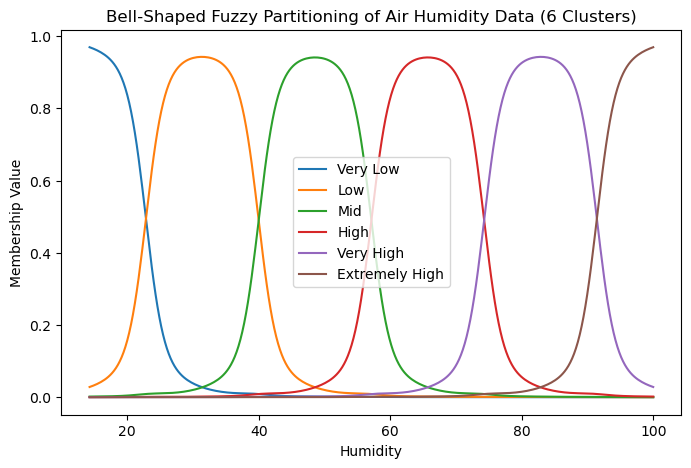

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "pump dataset.csv"  # Replace with the actual file path
df = pd.read_csv(file_path)

# Extract the air humidity data
air_humidity = np.linspace(df["humidity"].min(), df["humidity"].max(), 300)

# Define clusters
k = 6
cluster_centers = np.linspace(min(air_humidity), max(air_humidity), k)
cluster_names = ["Very Low", "Low", "Mid", "High", "Very High", "Extremely High"]

# Define parameters for bell-shaped membership function
a = (max(air_humidity) - min(air_humidity)) / (2 * k)  # Spread factor
b = 2  # Controls the slope

def bell_mf(x, c, a, b):
    return 1 / (1 + np.abs((x - c) / a) ** (2 * b))

membership_values = np.array([bell_mf(air_humidity, c, a, b) for c in cluster_centers])

# Normalize memberships so they sum to 1 across clusters for each data point
membership_sums = np.sum(membership_values, axis=0)
membership_values /= membership_sums

# Plot membership functions
plt.figure(figsize=(8, 5))
for i, (center, name) in enumerate(zip(cluster_centers, cluster_names)):
    plt.plot(air_humidity, membership_values[i], label=f'{name}')

plt.xlabel("Humidity")
plt.ylabel("Membership Value")
plt.title("Bell-Shaped Fuzzy Partitioning of Humidity Data (6 Clusters)")
plt.legend()
plt.show()


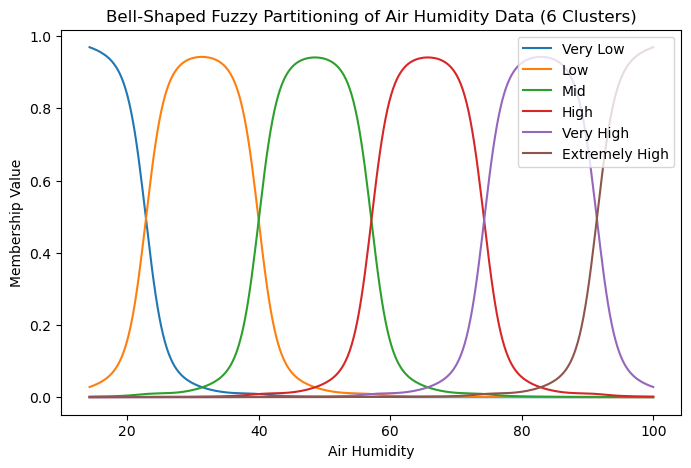

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "pump dataset.csv"  # Replace with the actual file path
df = pd.read_csv(file_path)

# Extract the air humidity data
air_humidity = np.linspace(df["humidity"].min(), df["humidity"].max(), 300)

# Define clusters
k = 6
cluster_centers = np.linspace(min(air_humidity), max(air_humidity), k)
cluster_names = ["Very Low", "Low", "Mid", "High", "Very High", "Extremely High"]

# Define parameters for bell-shaped membership function
a = (max(air_humidity) - min(air_humidity)) / (2 * k)  # Spread factor
b = 2  # Controls the slope

def bell_mf(x, c, a, b):
    return 1 / (1 + np.abs((x - c) / a) ** (2 * b))

membership_values = np.array([bell_mf(air_humidity, c, a, b) for c in cluster_centers])

# Normalize memberships so they sum to 1 across clusters for each data point
membership_sums = np.sum(membership_values, axis=0)
membership_values /= membership_sums

# Plot membership functions
plt.figure(figsize=(8, 5))
for i, (center, name) in enumerate(zip(cluster_centers, cluster_names)):
    plt.plot(air_humidity, membership_values[i], label=f'{name}')

plt.xlabel("Air Humidity")
plt.ylabel("Membership Value")
plt.title("Bell-Shaped Fuzzy Partitioning of Air Humidity Data (6 Clusters)")
plt.legend(loc='upper right')
plt.show()


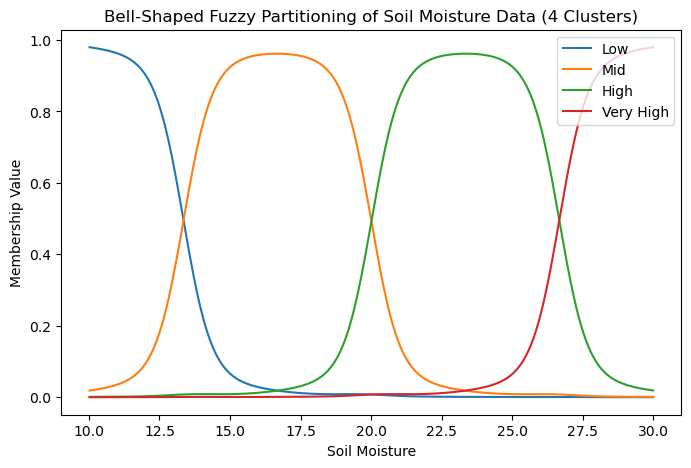

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "pump dataset.csv"  # Replace with the actual file path
df = pd.read_csv(file_path)

# Extract the soil moisture data
soil_moisture = np.linspace(df["soil_moisture"].min(), df["soil_moisture"].max(), 300)

# Define clusters for soil moisture
k = 4
cluster_centers = np.linspace(min(soil_moisture), max(soil_moisture), k)
cluster_names = ["Low", "Mid", "High", "Very High"]

# Define parameters for bell-shaped membership function
a = (max(soil_moisture) - min(soil_moisture)) / (2 * k)  # Spread factor
b = 2  # Controls the slope

def bell_mf(x, c, a, b):
    return 1 / (1 + np.abs((x - c) / a) ** (2 * b))

membership_values = np.array([bell_mf(soil_moisture, c, a, b) for c in cluster_centers])

# Normalize memberships so they sum to 1 across clusters for each data point
membership_sums = np.sum(membership_values, axis=0)
membership_values /= membership_sums

# Plot membership functions
plt.figure(figsize=(8, 5))
for i, (center, name) in enumerate(zip(cluster_centers, cluster_names)):
    plt.plot(soil_moisture, membership_values[i], label=f'{name}')

plt.xlabel("Soil Moisture")
plt.ylabel("Membership Value")
plt.title("Bell-Shaped Fuzzy Partitioning of Soil Moisture Data (4 Clusters)")
plt.legend(loc='upper right')
plt.show()


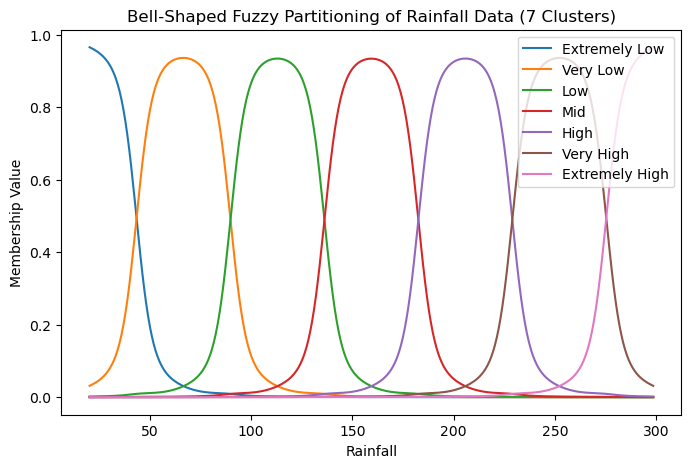

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "pump dataset.csv"  # Replace with the actual file path
df = pd.read_csv(file_path)

# Extract the rainfall data
rainfall = np.linspace(df["rainfall"].min(), df["rainfall"].max(), 300)

# Define clusters for rainfall
k = 7
cluster_centers = np.linspace(min(rainfall), max(rainfall), k)
cluster_names = ["Extremely Low", "Very Low", "Low", "Mid", "High", "Very High", "Extremely High"]

# Define parameters for bell-shaped membership function
a = (max(rainfall) - min(rainfall)) / (2 * k)  # Spread factor
b = 2  # Controls the slope

def bell_mf(x, c, a, b):
    return 1 / (1 + np.abs((x - c) / a) ** (2 * b))

membership_values = np.array([bell_mf(rainfall, c, a, b) for c in cluster_centers])

# Normalize memberships so they sum to 1 across clusters for each data point
membership_sums = np.sum(membership_values, axis=0)
membership_values /= membership_sums

# Plot membership functions
plt.figure(figsize=(8, 5))
for i, (center, name) in enumerate(zip(cluster_centers, cluster_names)):
    plt.plot(rainfall, membership_values[i], label=f'{name}')

plt.xlabel("Rainfall")
plt.ylabel("Membership Value")
plt.title("Bell-Shaped Fuzzy Partitioning of Rainfall Data (7 Clusters)")
plt.legend(loc='upper right')
plt.show()


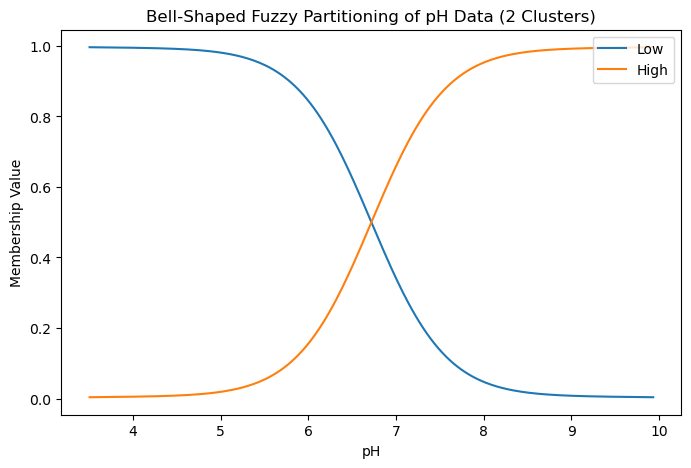

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "pump dataset.csv"  # Replace with the actual file path
df = pd.read_csv(file_path)

# Extract the pH data
ph = np.linspace(df["ph"].min(), df["ph"].max(), 300)

# Define clusters for pH
k = 2
cluster_centers = np.linspace(min(ph), max(ph), k)
cluster_names = ["Low", "High"]

# Define parameters for bell-shaped membership function
a = (max(ph) - min(ph)) / (2 * k)  # Spread factor
b = 2  # Controls the slope

def bell_mf(x, c, a, b):
    return 1 / (1 + np.abs((x - c) / a) ** (2 * b))

membership_values = np.array([bell_mf(ph, c, a, b) for c in cluster_centers])

# Normalize memberships so they sum to 1 across clusters for each data point
membership_sums = np.sum(membership_values, axis=0)
membership_values /= membership_sums

# Plot membership functions
plt.figure(figsize=(8, 5))
for i, (center, name) in enumerate(zip(cluster_centers, cluster_names)):
    plt.plot(ph, membership_values[i], label=f'{name}')

plt.xlabel("pH")
plt.ylabel("Membership Value")
plt.title("Bell-Shaped Fuzzy Partitioning of pH Data (2 Clusters)")
plt.legend(loc='upper right')
plt.show()


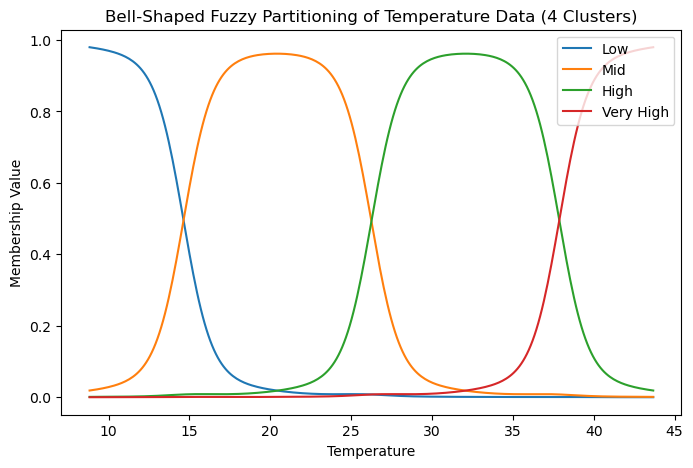

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "pump dataset.csv"  # Replace with the actual file path
df = pd.read_csv(file_path)

# Extract the temperature data
temperature = np.linspace(df["temperature"].min(), df["temperature"].max(), 300)

# Define clusters for temperature
k = 4
cluster_centers = np.linspace(min(temperature), max(temperature), k)
cluster_names = ["Low", "Mid", "High", "Very High"]

# Define parameters for bell-shaped membership function
a = (max(temperature) - min(temperature)) / (2 * k)  # Spread factor
b = 2  # Controls the slope

def bell_mf(x, c, a, b):
    return 1 / (1 + np.abs((x - c) / a) ** (2 * b))

membership_values = np.array([bell_mf(temperature, c, a, b) for c in cluster_centers])

# Normalize memberships so they sum to 1 across clusters for each data point
membership_sums = np.sum(membership_values, axis=0)
membership_values /= membership_sums

# Plot membership functions
plt.figure(figsize=(8, 5))
for i, (center, name) in enumerate(zip(cluster_centers, cluster_names)):
    plt.plot(temperature, membership_values[i], label=f'{name}')

plt.xlabel("Temperature")
plt.ylabel("Membership Value")
plt.title("Bell-Shaped Fuzzy Partitioning of Temperature Data (4 Clusters)")
plt.legend(loc='upper right')
plt.show()

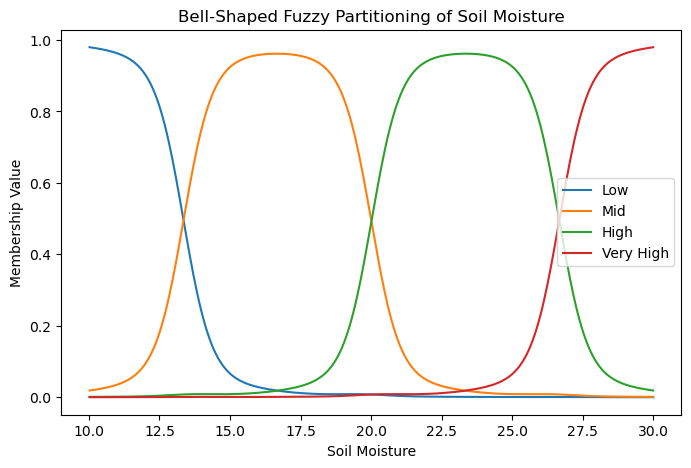

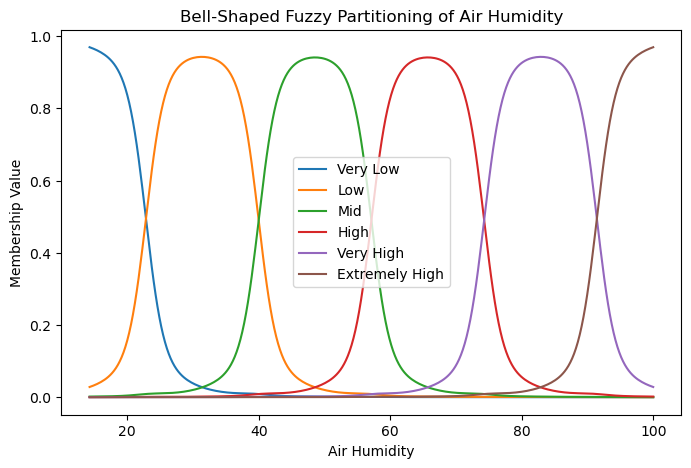

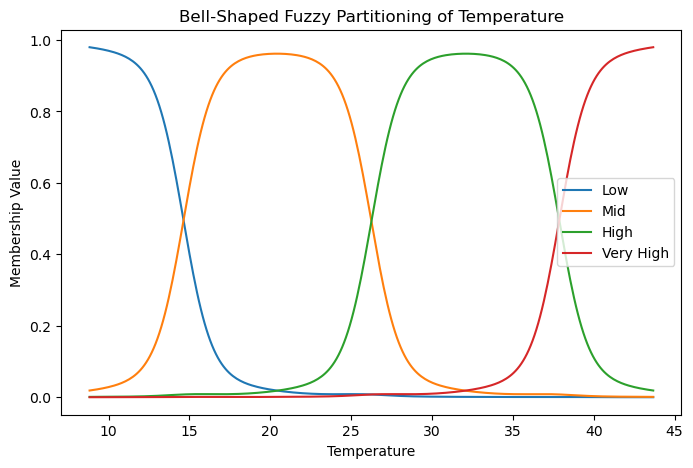

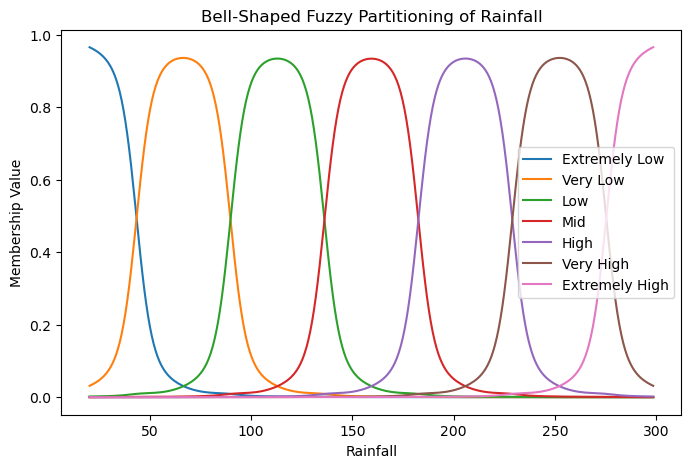

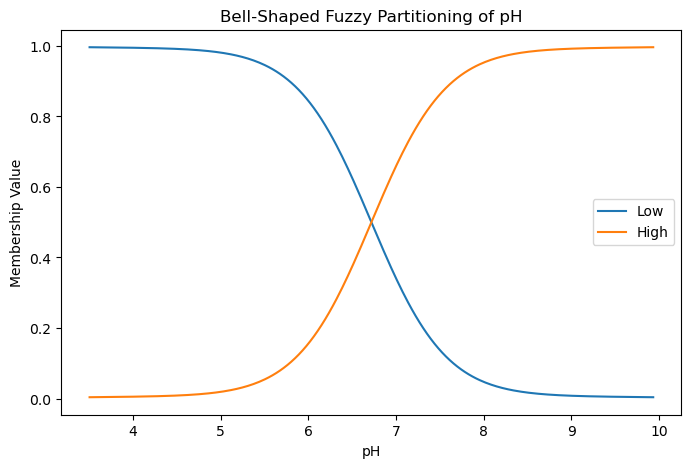

In [3]:
#bellshaped membership function

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "pump dataset.csv"  # Replace with the actual file path
df = pd.read_csv(file_path)

# Define bell-shaped membership function
def bell_mf(x, c, a, b):
    return 1 / (1 + np.abs((x - c) / a) ** (2 * b))

# === 1. Soil Moisture ===
soil_moisture = np.linspace(df["soil_moisture"].min(), df["soil_moisture"].max(), 300)
k_soil = 4
centers_soil = np.linspace(min(soil_moisture), max(soil_moisture), k_soil)
names_soil = ["Low", "Mid", "High", "Very High"]
a_soil = (max(soil_moisture) - min(soil_moisture)) / (2 * k_soil)
b = 2

membership_soil = np.array([bell_mf(soil_moisture, c, a_soil, b) for c in centers_soil])
membership_soil /= np.sum(membership_soil, axis=0)

plt.figure(figsize=(8, 5))
for i, name in enumerate(names_soil):
    plt.plot(soil_moisture, membership_soil[i], label=name)
plt.xlabel("Soil Moisture")
plt.ylabel("Membership Value")
plt.title("Bell-Shaped Fuzzy Partitioning of Soil Moisture")
plt.legend()
plt.show()

# === 2. Air Humidity ===
humidity = np.linspace(df["humidity"].min(), df["humidity"].max(), 300)
k_humidity = 6
centers_humidity = np.linspace(min(humidity), max(humidity), k_humidity)
names_humidity = ["Very Low", "Low", "Mid", "High", "Very High", "Extremely High"]
a_humidity = (max(humidity) - min(humidity)) / (2 * k_humidity)

membership_humidity = np.array([bell_mf(humidity, c, a_humidity, b) for c in centers_humidity])
membership_humidity /= np.sum(membership_humidity, axis=0)

plt.figure(figsize=(8, 5))
for i, name in enumerate(names_humidity):
    plt.plot(humidity, membership_humidity[i], label=name)
plt.xlabel("Air Humidity")
plt.ylabel("Membership Value")
plt.title("Bell-Shaped Fuzzy Partitioning of Air Humidity")
plt.legend()
plt.show()

# === 3. Temperature ===
temperature = np.linspace(df["temperature"].min(), df["temperature"].max(), 300)
k_temp = 4
centers_temp = np.linspace(min(temperature), max(temperature), k_temp)
names_temp = ["Low", "Mid", "High", "Very High"]
a_temp = (max(temperature) - min(temperature)) / (2 * k_temp)

membership_temp = np.array([bell_mf(temperature, c, a_temp, b) for c in centers_temp])
membership_temp /= np.sum(membership_temp, axis=0)

plt.figure(figsize=(8, 5))
for i, name in enumerate(names_temp):
    plt.plot(temperature, membership_temp[i], label=name)
plt.xlabel("Temperature")
plt.ylabel("Membership Value")
plt.title("Bell-Shaped Fuzzy Partitioning of Temperature")
plt.legend()
plt.show()

# === 4. Rainfall ===
rainfall = np.linspace(df["rainfall"].min(), df["rainfall"].max(), 300)
k_rain = 7
centers_rain = np.linspace(min(rainfall), max(rainfall), k_rain)
names_rain = ["Extremely Low", "Very Low", "Low", "Mid", "High", "Very High", "Extremely High"]
a_rain = (max(rainfall) - min(rainfall)) / (2 * k_rain)

membership_rain = np.array([bell_mf(rainfall, c, a_rain, b) for c in centers_rain])
membership_rain /= np.sum(membership_rain, axis=0)

plt.figure(figsize=(8, 5))
for i, name in enumerate(names_rain):
    plt.plot(rainfall, membership_rain[i], label=name)
plt.xlabel("Rainfall")
plt.ylabel("Membership Value")
plt.title("Bell-Shaped Fuzzy Partitioning of Rainfall")
plt.legend()
plt.show()

# === 5. pH ===
ph = np.linspace(df["ph"].min(), df["ph"].max(), 300)
k_ph = 2
centers_ph = np.linspace(min(ph), max(ph), k_ph)
names_ph = ["Low", "High"]
a_ph = (max(ph) - min(ph)) / (2 * k_ph)

membership_ph = np.array([bell_mf(ph, c, a_ph, b) for c in centers_ph])
membership_ph /= np.sum(membership_ph, axis=0)

plt.figure(figsize=(8, 5))
for i, name in enumerate(names_ph):
    plt.plot(ph, membership_ph[i], label=name)
plt.xlabel("pH")
plt.ylabel("Membership Value")
plt.title("Bell-Shaped Fuzzy Partitioning of pH")
plt.legend()
plt.show()


In [7]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Bell-shaped membership function
def bell_mf(x, a, b, c):
    return 1 / (1 + np.abs((x - c) / a) ** (2 * b))

# Define input variables
soil_moisture = ctrl.Antecedent(np.arange(0, 101, 1), 'soil_moisture')
rainfall = ctrl.Antecedent(np.arange(0, 101, 1), 'rainfall')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
temperature = ctrl.Antecedent(np.arange(0, 51, 1), 'temperature')
ph = ctrl.Antecedent(np.arange(0, 14, 1), 'ph')

# Define output variable
pump = ctrl.Consequent(np.arange(0, 1.1, 0.1), 'pump')

# Membership functions
soil_moisture['very_low'] = bell_mf(soil_moisture.universe, 8, 2, 5)
soil_moisture['low'] = bell_mf(soil_moisture.universe, 10, 2, 20)
soil_moisture['medium'] = bell_mf(soil_moisture.universe, 10, 2, 50)
soil_moisture['high'] = bell_mf(soil_moisture.universe, 10, 2, 80)
soil_moisture['very_high'] = bell_mf(soil_moisture.universe, 8, 2, 95)

rainfall['extremely_low'] = bell_mf(rainfall.universe, 8, 2, 0)
rainfall['very_low'] = bell_mf(rainfall.universe, 10, 2, 15)
rainfall['low'] = bell_mf(rainfall.universe, 10, 2, 30)
rainfall['mid'] = bell_mf(rainfall.universe, 10, 2, 50)
rainfall['high'] = bell_mf(rainfall.universe, 10, 2, 70)
rainfall['very_high'] = bell_mf(rainfall.universe, 10, 2, 85)
rainfall['extremely_high'] = bell_mf(rainfall.universe, 8, 2, 100)

humidity['very_low'] = bell_mf(humidity.universe, 8, 2, 5)
humidity['low'] = bell_mf(humidity.universe, 10, 2, 20)
humidity['mid'] = bell_mf(humidity.universe, 10, 2, 40)
humidity['high'] = bell_mf(humidity.universe, 10, 2, 60)
humidity['very_high'] = bell_mf(humidity.universe, 10, 2, 80)
humidity['extremely_high'] = bell_mf(humidity.universe, 8, 2, 95)

temperature['low'] = bell_mf(temperature.universe, 4, 2, 10)
temperature['mid'] = bell_mf(temperature.universe, 5, 2, 20)
temperature['high'] = bell_mf(temperature.universe, 5, 2, 30)
temperature['very_high'] = bell_mf(temperature.universe, 5, 2, 40)
temperature['extremely_high'] = bell_mf(temperature.universe, 4, 2, 50)

ph['low'] = bell_mf(ph.universe, 1, 2, 4)
ph['high'] = bell_mf(ph.universe, 1, 2, 8)

# Output membership functions (TSK 0-order crisp values)
pump['OFF'] = fuzz.trimf(pump.universe, [0, 0, 0])
pump['ON'] = fuzz.trimf(pump.universe, [1, 1, 1])

# Your rules would be here (left as-is)

# Make sure you've copied the full list of rules defined in your original script
# ...

# Define fuzzy control system
pump_ctrl = ctrl.ControlSystem(rules)
pump_sim = ctrl.ControlSystemSimulation(pump_ctrl)

# Ask for user input
try:
    sm_input = float(input("Enter soil moisture (0-100): "))
    rf_input = float(input("Enter rainfall (0-100): "))
    hm_input = float(input("Enter humidity (0-100): "))
    tp_input = float(input("Enter temperature (0-50): "))
    ph_input = float(input("Enter pH (0-14): "))

    # Apply user input
    pump_sim.input['soil_moisture'] = sm_input
    pump_sim.input['rainfall'] = rf_input
    pump_sim.input['humidity'] = hm_input
    pump_sim.input['temperature'] = tp_input
    pump_sim.input['ph'] = ph_input

    # Compute result
    pump_sim.compute()
    output1 = pump_sim.output['pump']
    print("\nPump activation level (0=OFF, 1=ON):", round(output1, 2))

    # Decision output
    if output1 >= 0.5:
        print("Pump is ON")
    else:
        print("Pump is OFF")

except ValueError:
    print("Invalid input! Please enter numeric values in the specified ranges.")


Enter soil moisture (0-100):  95
Enter rainfall (0-100):  30
Enter humidity (0-100):  60
Enter temperature (0-50):  28
Enter pH (0-14):  7



Pump activation level (0=OFF, 1=ON): 0.25
Pump is OFF
